In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imresize, imread
from tqdm import tqdm_notebook, tnrange
import cv2
from glob import glob
import pickle
import peakutils
from scipy import signal
import imageio
from moviepy.editor import VideoFileClip, ipython_display
from IPython.display import HTML

%matplotlib inline

In [50]:
img = imread('test_images/test5.jpg')

In [51]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
luv = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
xyz = cv2.cvtColor(img, cv2.COLOR_RGB2XYZ)
yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)

color_spaces_names = ['rgb', 'hsv', 'hls', 'luv', 'lab', 'xyz', 'yuv']
color_spaces = [img, hsv, hls, luv, lab, xyz, yuv]

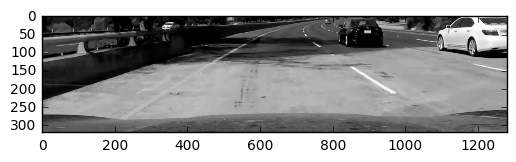

In [52]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray[400:,:], cmap='gray')

In [53]:
def extract_line(img):
    max_val = img.max()
    img = img[400:,:]
    p = int(np.percentile(img, 99.5)-30)
    mask = cv2.inRange(img, (p), (255))
    return mask

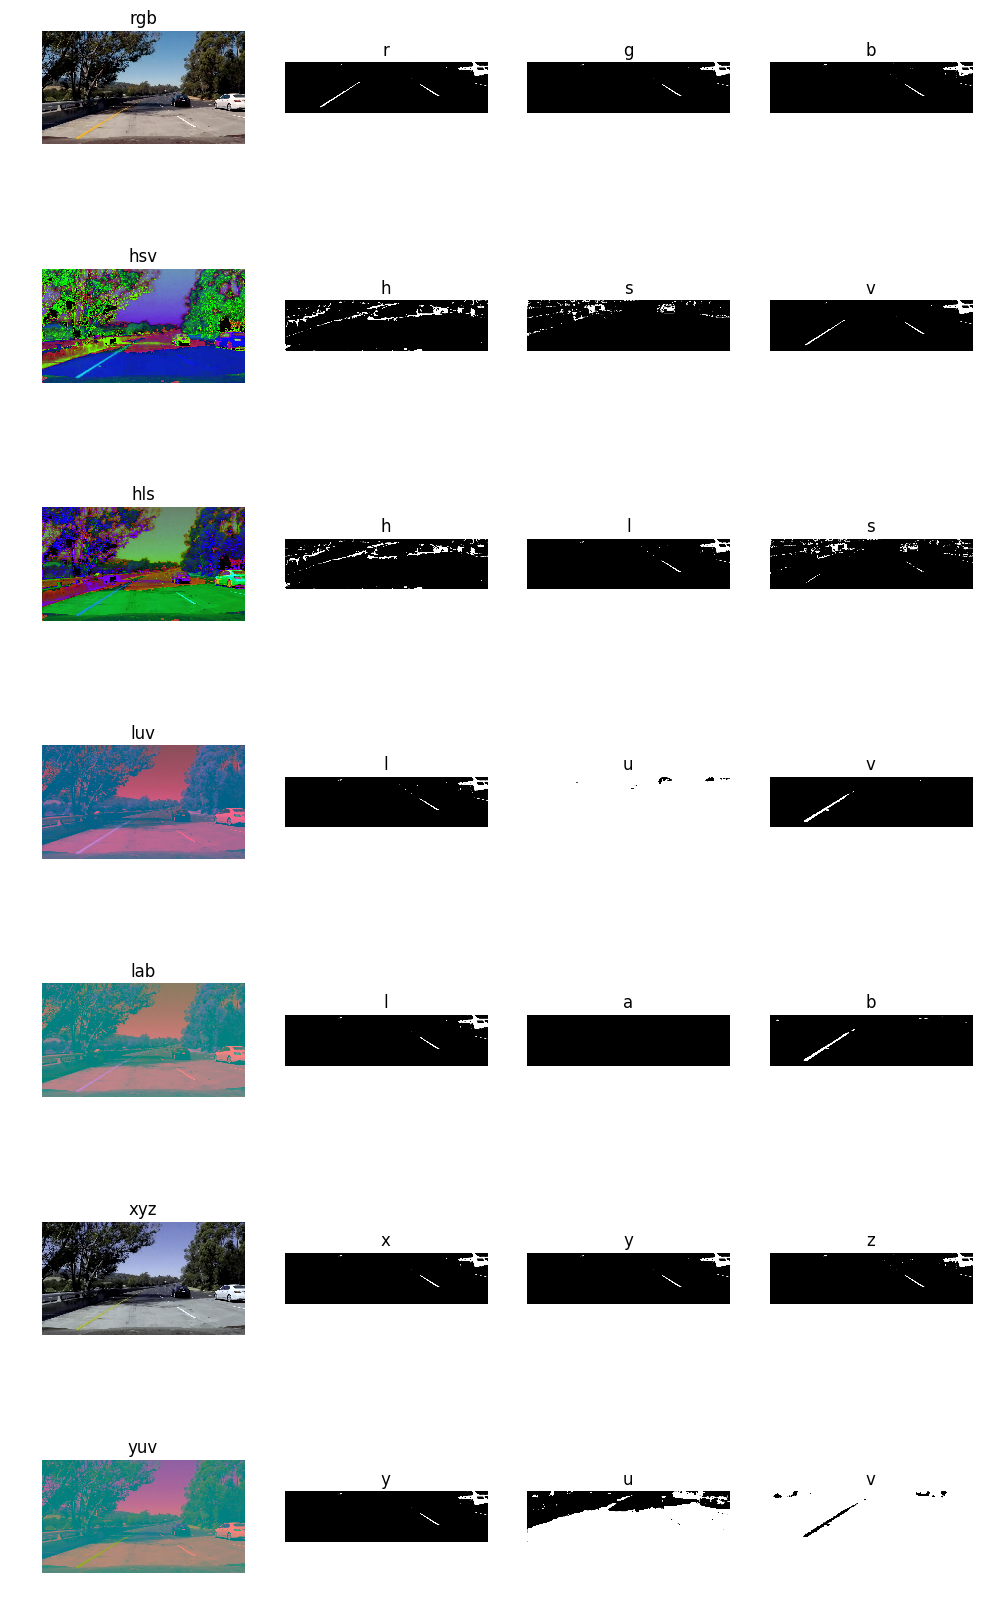

In [54]:
rows = len(color_spaces)

fig, axis = plt.subplots(rows, 4, figsize=(12, 3*rows))
for row, cs in enumerate(color_spaces):
    axis[row, 0].set_title(color_spaces_names[row])
    axis[row, 0].imshow(cs)
    axis[row, 0].axis('off')
    for ch in range(3):
        axis[row, ch + 1].set_title(color_spaces_names[row][ch])
        axis[row, ch + 1].imshow(extract_line(cs[:,:,ch]), cmap='gray')
        axis[row, ch + 1].axis('off')

In [89]:
def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")

    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

36.885078125
53.8221484375


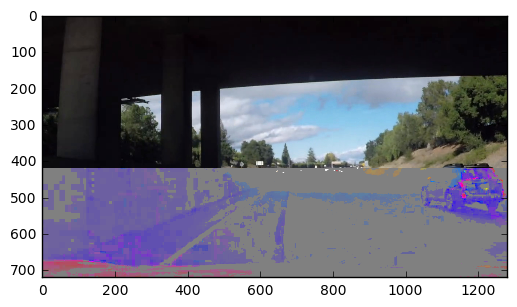

In [112]:
img = imread('test_images/test12.jpg')
img = adjust_gamma(img, 1)
hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
l = hls[-300:,:,1]
s = hls[-300:,:,2]

mean_l = np.mean(l)
print(mean_l)
mean_s = np.mean(s)
print(mean_s)

l[l < 230] = 128

s[s < mean_s] = 0
i = cv2.cvtColor(hls, cv2.COLOR_HLS2RGB)

plt.imshow(i)

In [ ]:
132.087744792
47.3823125